In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

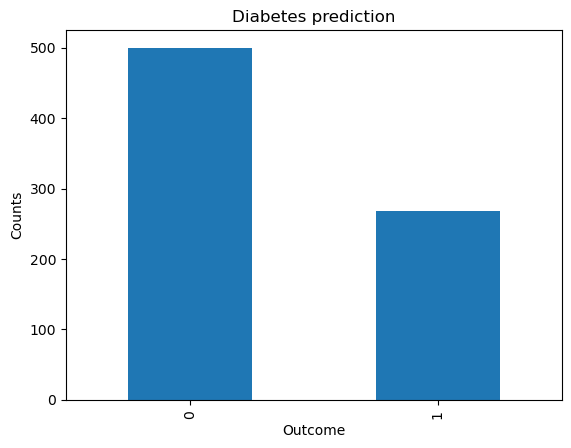

In [8]:
df['Outcome'].value_counts().plot(kind="bar")
plt.title("Diabetes prediction")
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.savefig('plot.png')

In [9]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [10]:
X.shape

(768, 8)

In [11]:
y.shape

(768,)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [13]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,3,115,66,39,140,38.1,0.150,28
313,3,113,50,10,85,29.5,0.626,25
195,5,158,84,41,210,39.4,0.395,29
570,3,78,70,0,0,32.5,0.270,39
226,0,101,76,0,0,35.7,0.198,26


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import  confusion_matrix,ConfusionMatrixDisplay

In [15]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('accuracy=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy= 0.7272727272727273
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        96
           1       0.66      0.57      0.61        58

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.73      0.72       154



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [19]:
log=LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)
y_pred1=log.predict(X_test)
print('accuracy=',accuracy_score(y_test,y_pred1))

accuracy= 0.8051948051948052


In [20]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)
print('accuracy=',accuracy_score(y_test,y_pred2))

accuracy= 0.7662337662337663


In [21]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print('accuracy=',accuracy_score(y_test,y_pred3))

accuracy= 0.7727272727272727


In [22]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred4=svm.predict(X_test)
print('accuracy=',accuracy_score(y_test,y_pred4))

accuracy= 0.7792207792207793


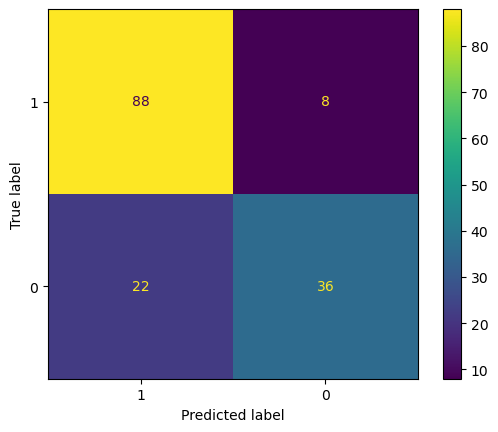

In [23]:
cm=confusion_matrix(y_test,y_pred1)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=df['Outcome'].unique())
cm_plot.plot()
plt.savefig("confusion_matrix.png")

In [24]:
import joblib
joblib.dump(log,'model.joblib')
print("SUCCESS!!")

SUCCESS!!
